In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv(r"C:\Users\shashank agarwal\Downloads\Telecom_customer_churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
print(df.Churn.value_counts())
df.replace({"Yes":"1","No":"0"},inplace=True)

No     5174
Yes    1869
Name: Churn, dtype: int64


In [7]:
# since the data is inbalanced , hence we need to do balancing .

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.drop(columns=["customerID","TotalCharges"],inplace=True)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1
5,Female,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,1
6,Male,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,0
7,Female,0,0,0,10,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,0
8,Female,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,1
9,Male,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,0


In [10]:
df.MultipleLines.value_counts()
df.replace({"No phone service":"2"},inplace=True)
df.OnlineSecurity.value_counts()
df.replace({"No internet service":"2"},inplace=True)

df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,1,0,1,0,2,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1
3,Male,0,0,0,45,0,2,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1


In [11]:
from sklearn.preprocessing import LabelEncoder

data_frame=["gender","InternetService","Contract","PaymentMethod"] 
df[data_frame]=df[data_frame].apply(LabelEncoder().fit_transform)  
df.head(1000)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,35,1,1,2,0,1,0,1,0,0,0,0,1,85.30,1
996,0,0,0,0,34,1,0,2,0,0,0,0,0,0,0,1,1,70.00,1
997,0,1,0,0,4,1,1,2,0,0,0,0,1,1,0,1,2,94.30,1
998,1,0,1,0,72,1,0,0,2,2,2,2,2,2,2,0,0,20.70,0


In [12]:
# The dataset is god to go , without any null values , and the ctegorical non numeric columns has also been treated ,all the columns acts as featurs and the last column,Churn is the predicted output .Lets build a classification model for the same !                 

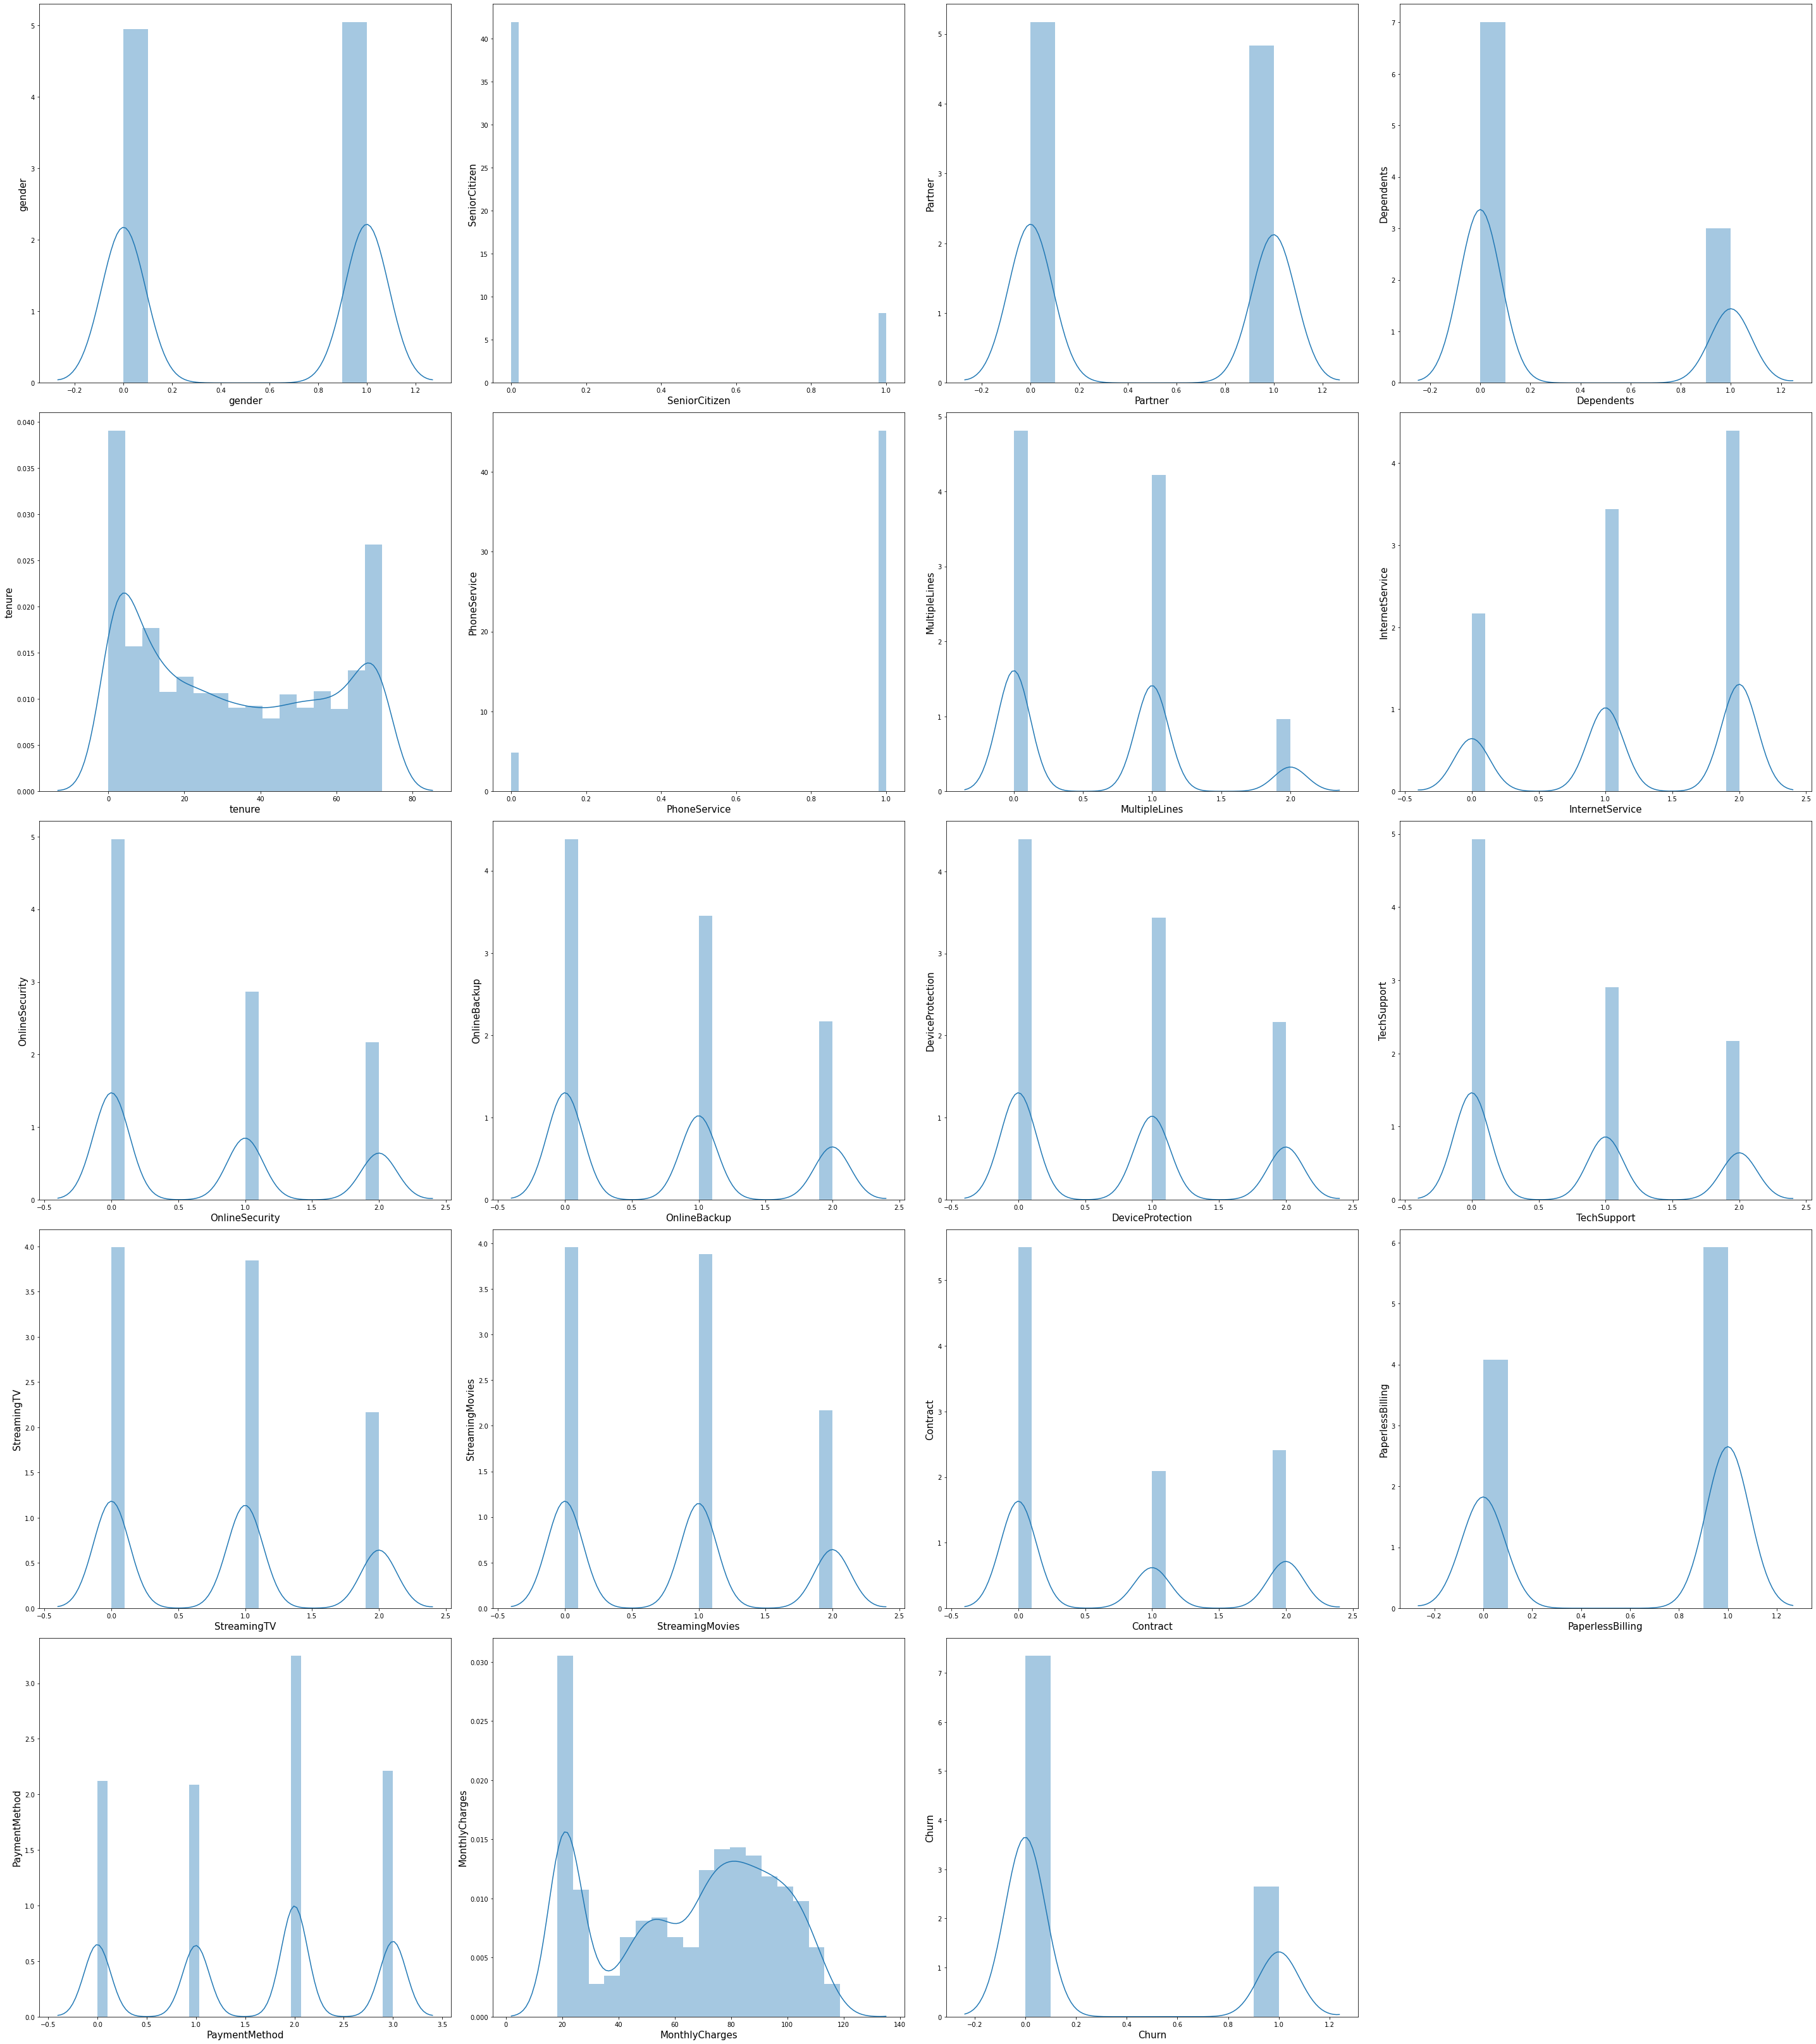

In [13]:
plt.figure(figsize=(40,45))
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()



In [14]:
df.MonthlyCharges=np.log(df.MonthlyCharges)

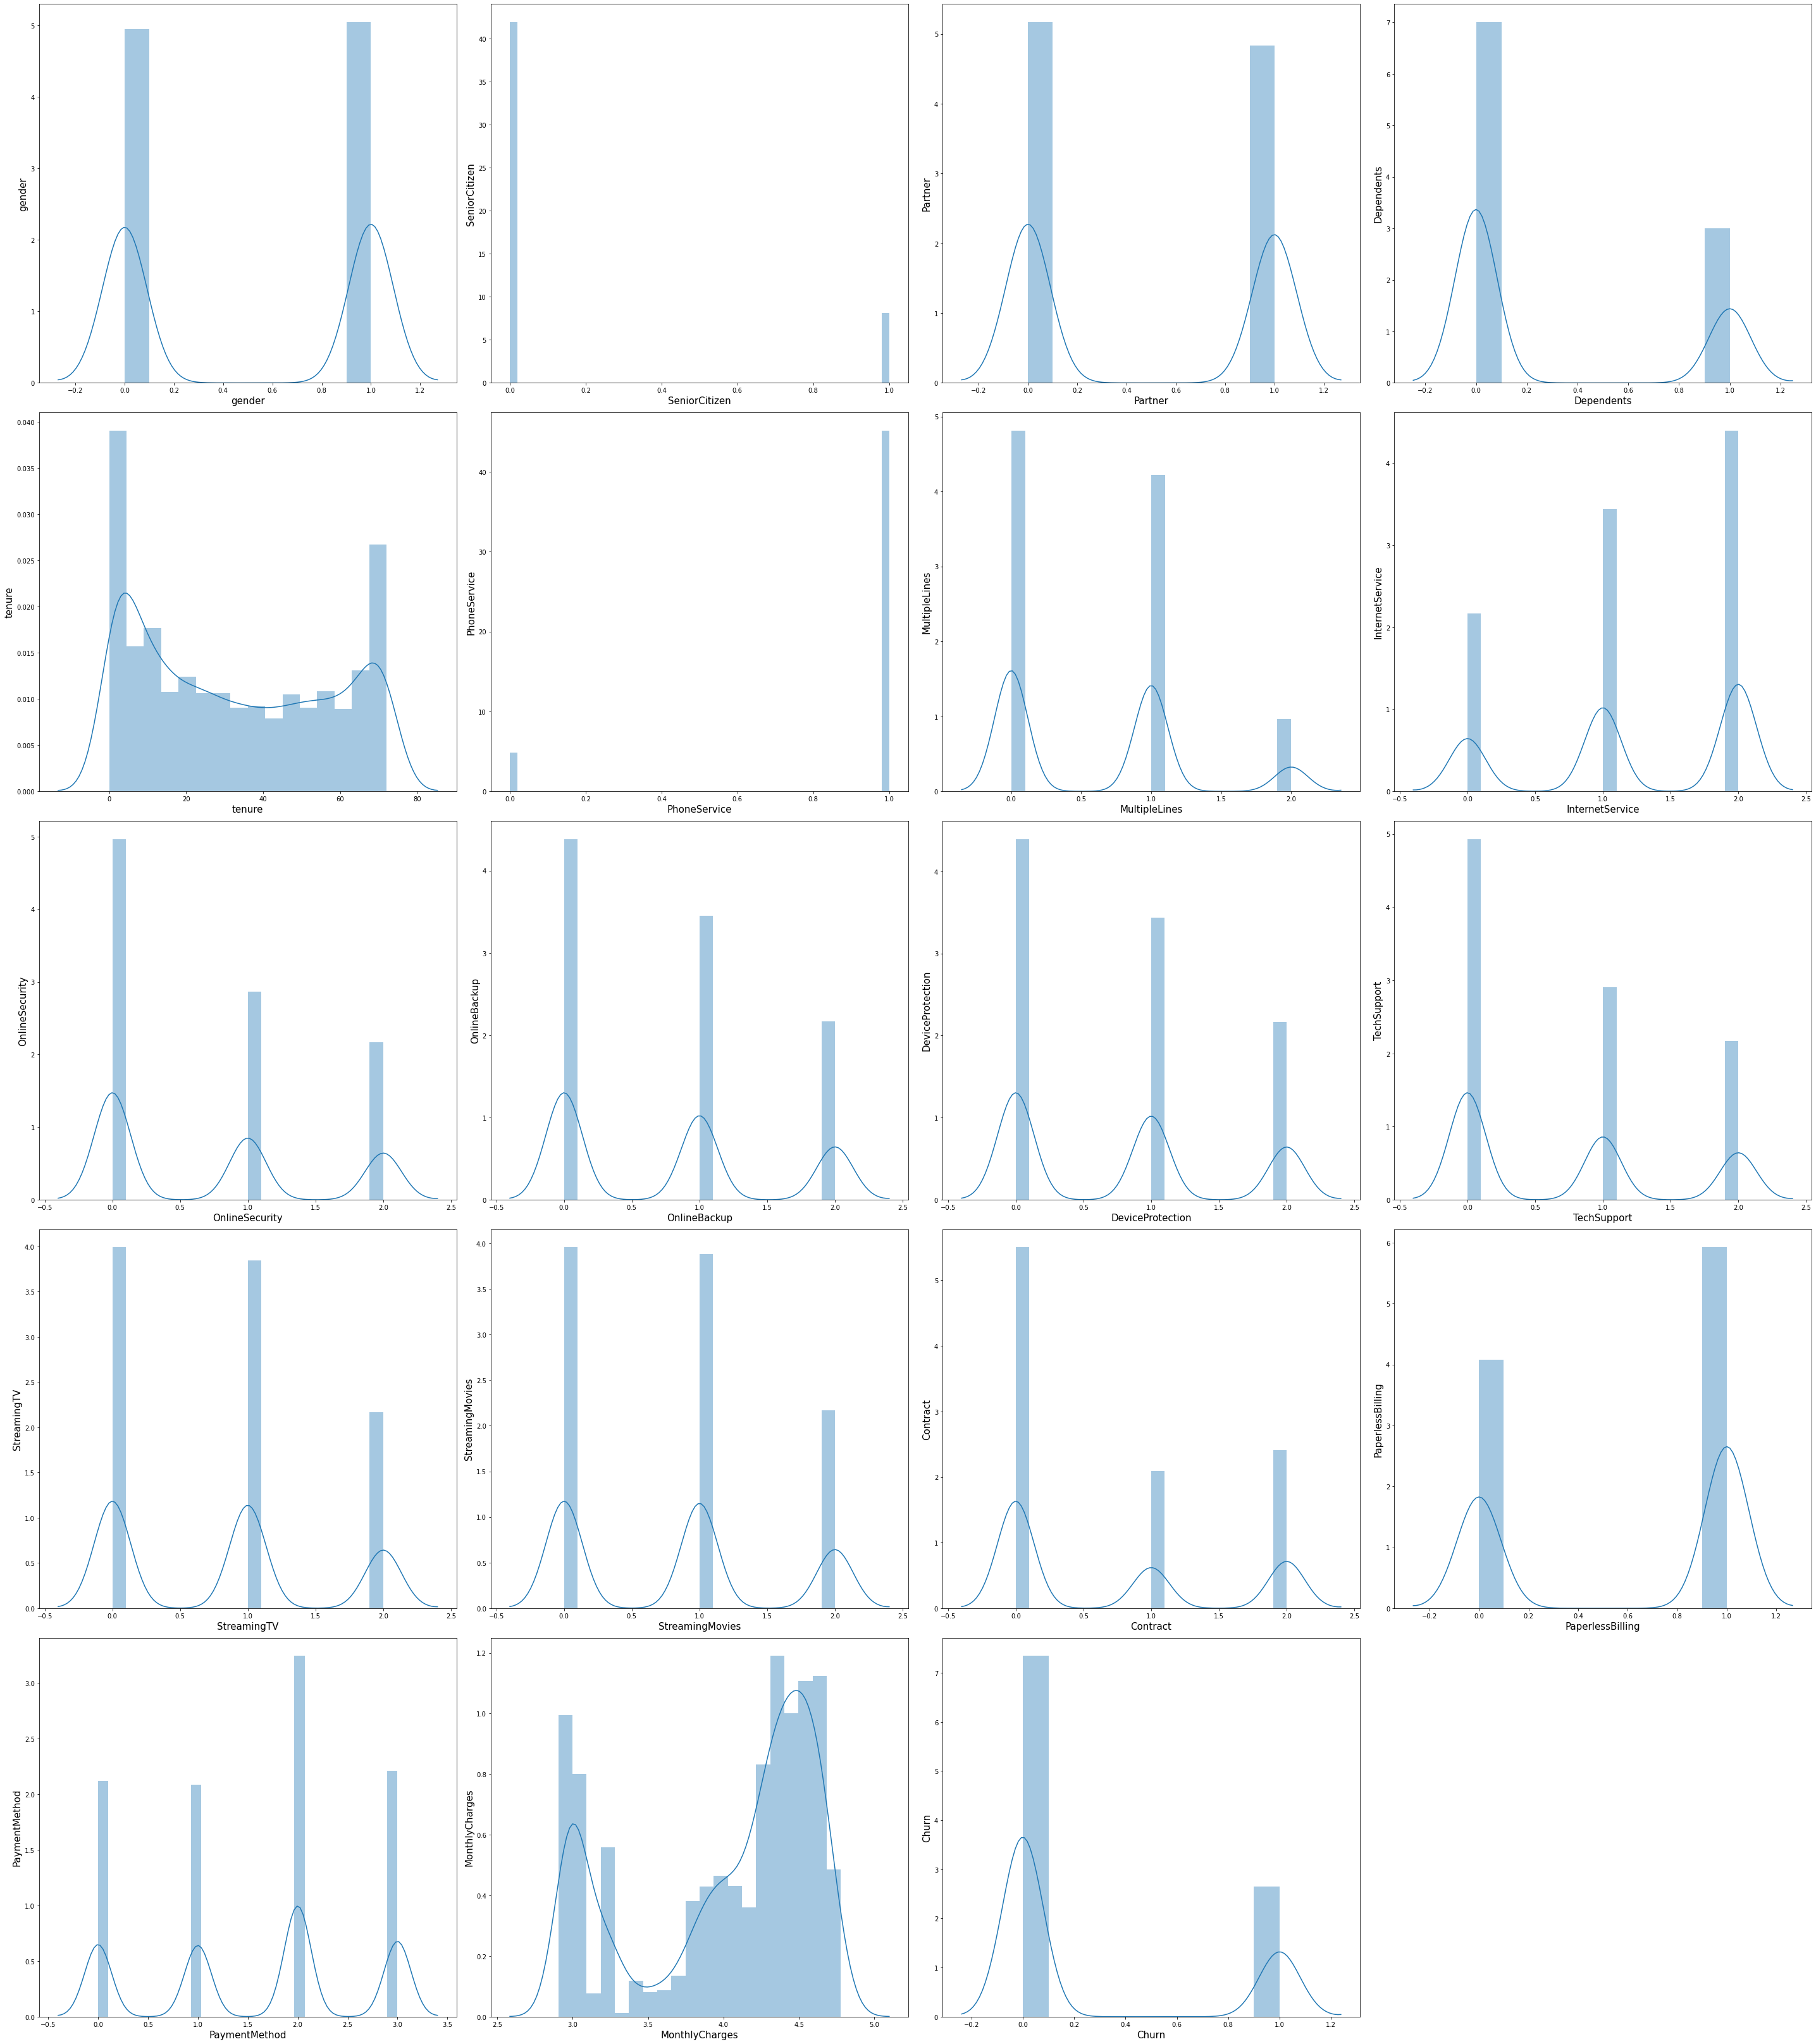

In [15]:
plt.figure(figsize=(40,45))
plotnumber=1
for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [17]:
corr=df.corr()
corr.shape

(7, 7)

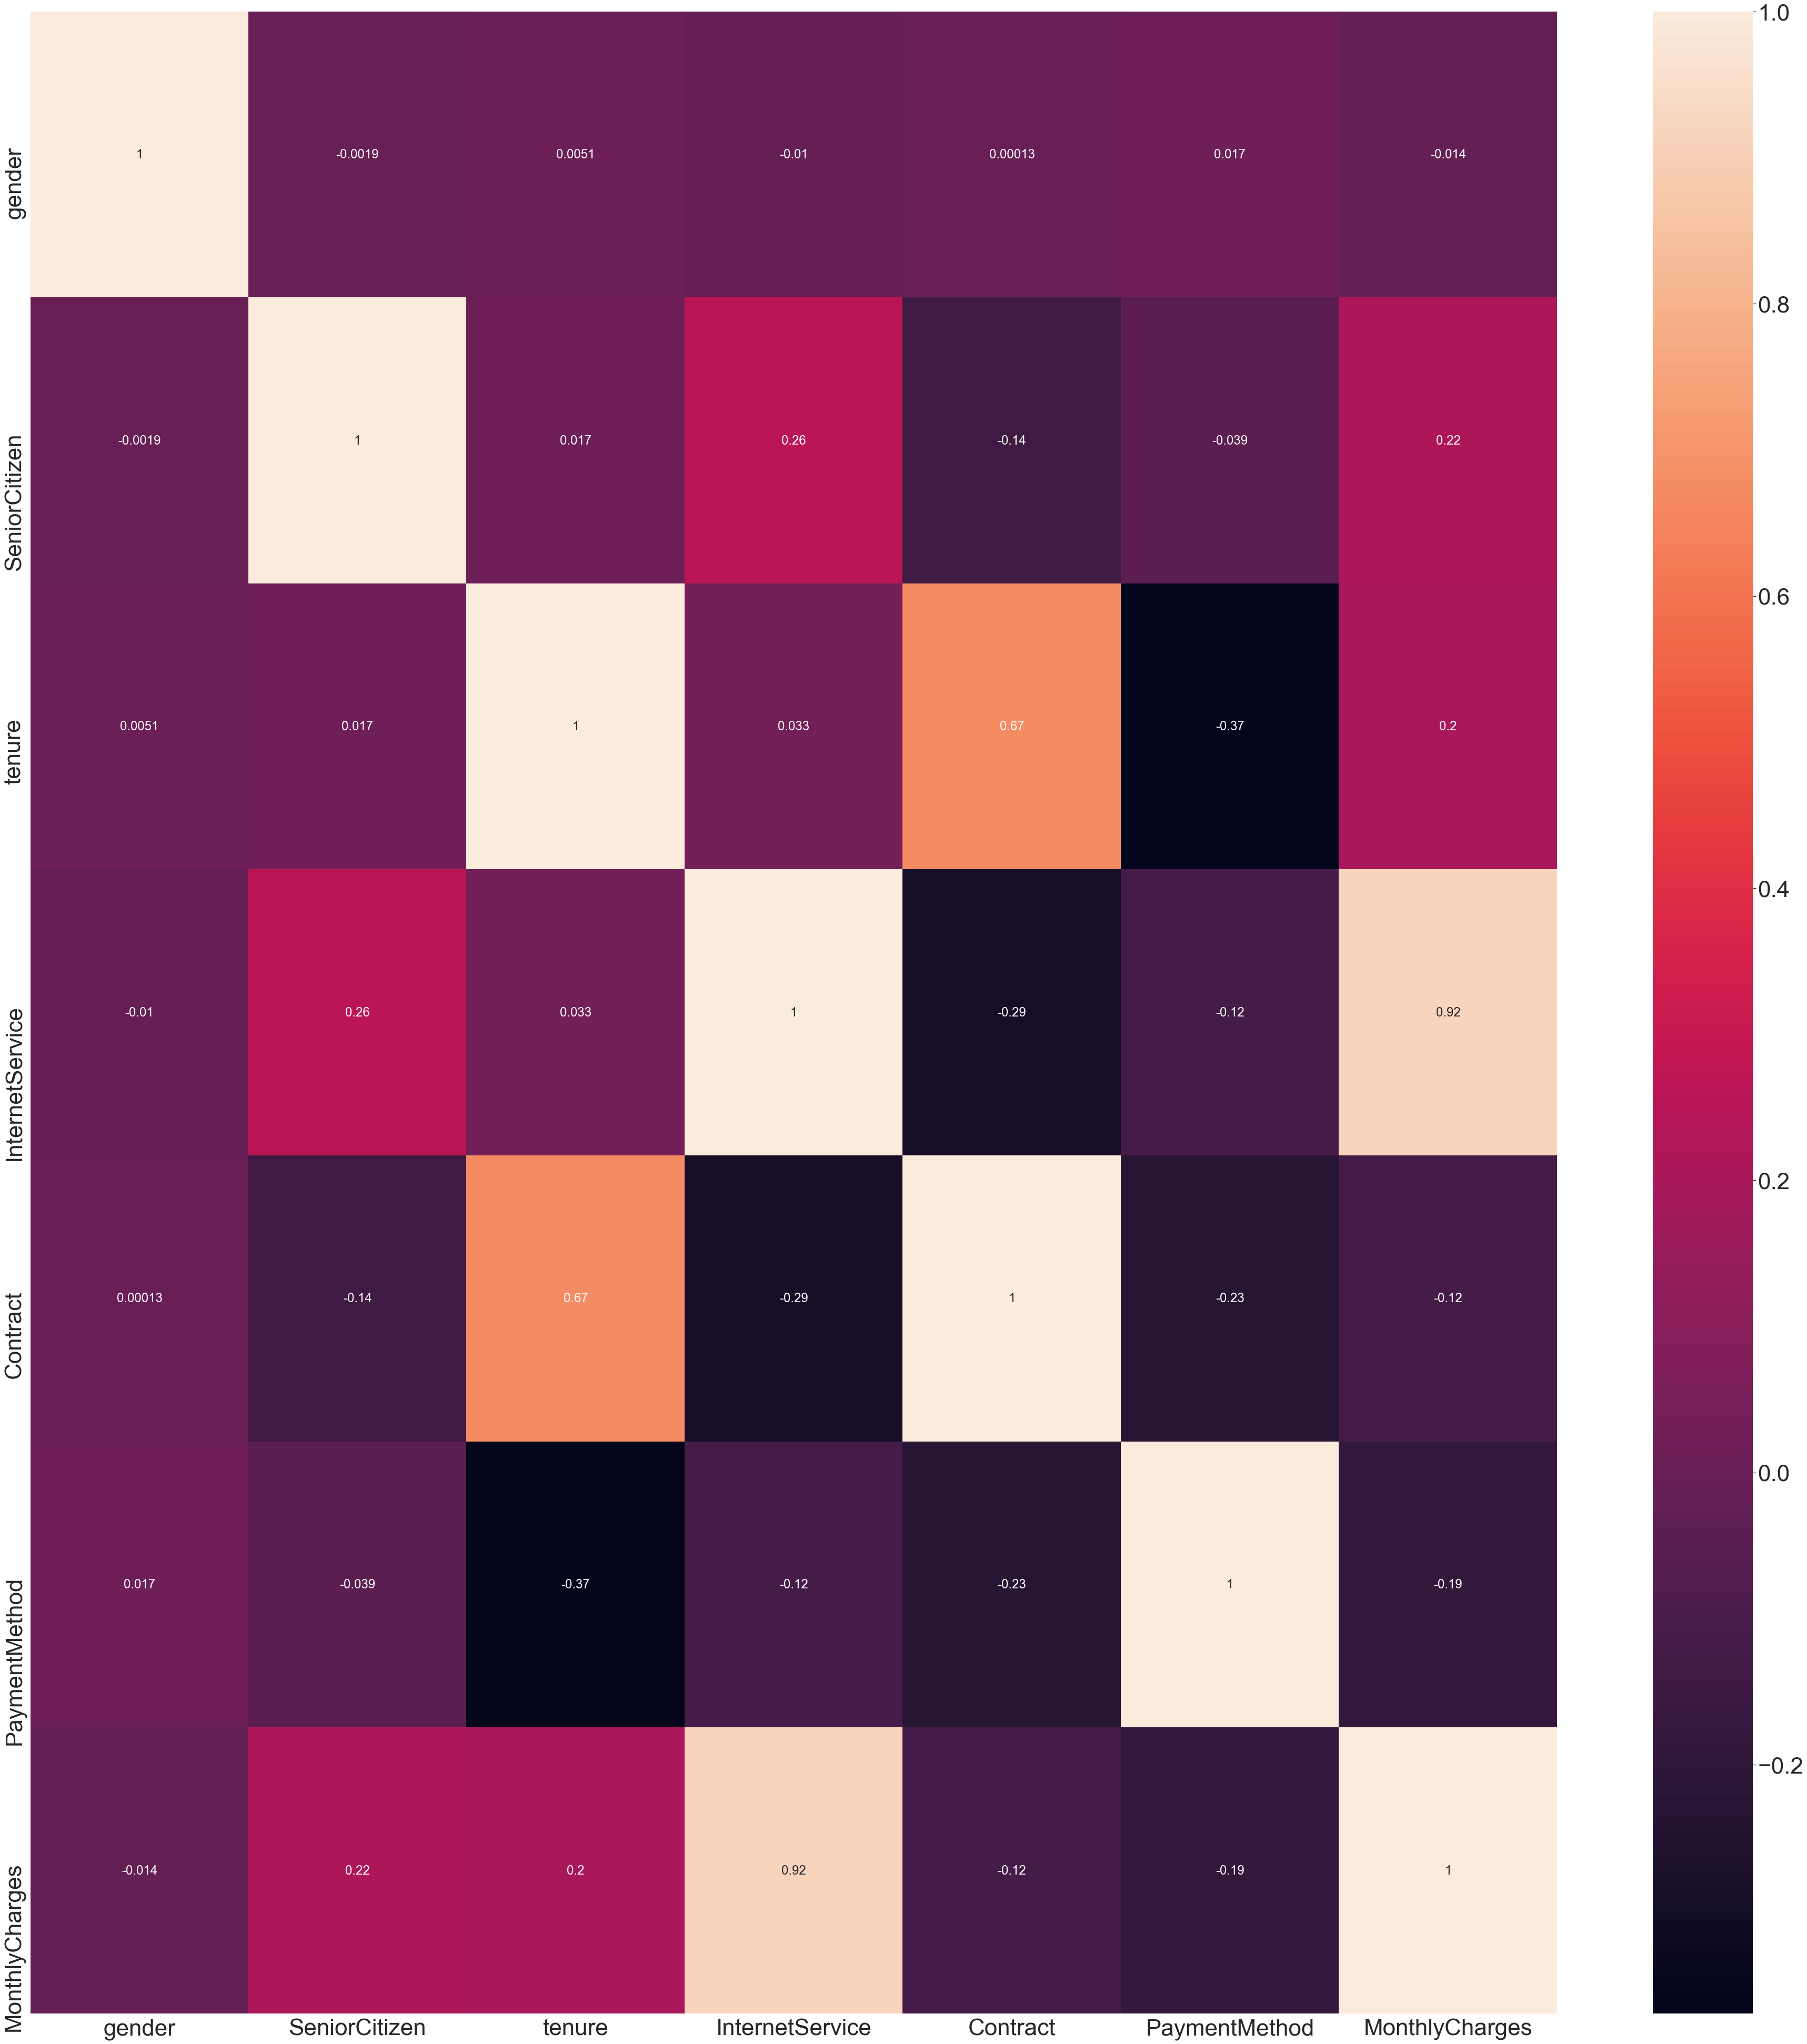

In [18]:
plt.figure(figsize=(65,70))
sns.set(font_scale=4)
sns.heatmap(corr,annot=True,annot_kws={'size':24}) 
plt.show()

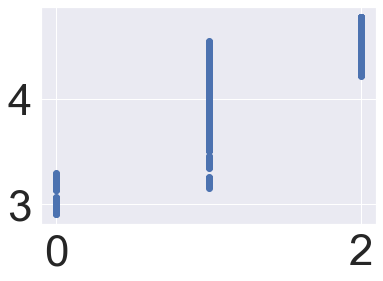

In [19]:
plt.scatter(df["InternetService"],df["MonthlyCharges"])

In [22]:
df.drop(df["InternetService"],inplace=True)

In [23]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,0,3.744787,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,2,4.258446,1
5,0,0,0,0,8,1,1,2,0,0,1,0,1,1,0,1,2,4.601664,1
6,1,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,1,4.489759,0
7,0,0,0,0,10,0,2,1,1,0,0,0,0,0,0,0,3,3.392829,0
8,0,0,1,0,28,1,1,2,0,0,1,1,1,1,0,1,2,4.652054,1
9,1,0,0,1,62,1,0,1,1,1,0,0,0,0,1,0,0,4.028027,0
10,1,0,1,1,13,1,0,1,1,0,0,0,0,0,0,1,3,3.911023,0
11,1,0,0,0,16,1,0,0,2,2,2,2,2,2,2,0,1,2.941804,0
12,1,0,1,0,58,1,1,2,0,0,1,0,1,1,1,0,1,4.608664,0


In [26]:
from sklearn.feature_selection import SelectKBest,f_classif
x=df.drop("Churn",axis=1)
y=df.Churn

best_features=SelectKBest(score_func=f_classif,k=15)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(15,"Scores_obtained"))

        Column_names  Scores_obtained
14          Contract      1314.404001
4             tenure       996.698550
8     OnlineSecurity       878.110135
11       TechSupport       859.708676
7    InternetService       785.971088
9       OnlineBackup       654.420979
10  DeviceProtection       605.241608
17    MonthlyCharges       325.738044
13   StreamingMovies       315.988761
12       StreamingTV       311.183628
15  PaperlessBilling       268.457351
3         Dependents       195.097347
1      SeniorCitizen       164.132805
2            Partner       162.623754
16     PaymentMethod        81.433216


In [27]:
final_data=["Contract","tenure","OnlineSecurity","TechSupport","InternetService","OnlineBackup","DeviceProtection",
           "MonthlyCharges","StreamingMovies","StreamingTV","PaperlessBilling","Dependents","SeniorCitizen","Partner","PaymentMethod"]

In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)
sm=SMOTE()
samp=SMOTE(0.75)
x_trains,y_trains=samp.fit_resample(x_train,y_train)
print("Before transformation",format(Counter(y_train)))
print("After Transformation",format(Counter(y_trains)))

Before transformation Counter({'0': 3879, '1': 1401})
After Transformation Counter({'0': 3879, '1': 2909})


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from time import time
start=time()
knn.fit(x_trains,y_trains)
print("Training Time:",time()-start) 
start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)




Training Time: 0.05600571632385254
Testing Time: 1.4847221374511719


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1293
           1       0.48      0.72      0.58       467

    accuracy                           0.72      1760
   macro avg       0.68      0.72      0.68      1760
weighted avg       0.77      0.72      0.73      1760



In [31]:
confusion_matrix(y_test,y_pred)

array([[924, 369],
       [129, 338]], dtype=int64)

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x,y,cv=6).mean()

0.7659097389542193

In [33]:
#The data is not overfitting , lets try algorithms as well

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid={"algorithm" : ["kd_tree","brute"],
           "leaf_size" : range(4,8),
           "n_neighbors" : [3,4,5,6,7]}

grdsrch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [35]:
grdsrch.fit(x_trains,y_trains)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(4, 8),
                         'n_neighbors': [3, 4, 5, 6, 7]})

In [36]:
grdsrch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 6, 'n_neighbors': 4}

In [37]:
knn=KNeighborsClassifier(algorithm='kd_tree', leaf_size=6, n_neighbors= 4)
from time import time
start=time()
knn.fit(x_trains,y_trains)
print("Training Time:",time()-start) 
start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

Training Time: 0.42175817489624023
Testing Time: 0.4420163631439209


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1293
           1       0.51      0.57      0.54       467

    accuracy                           0.74      1760
   macro avg       0.68      0.69      0.68      1760
weighted avg       0.75      0.74      0.75      1760



In [39]:
#Lets chck on other algorithms as well

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
start=time()
dt.fit(x_trains,y_trains)
print("Training Time:",time()-start)
start=time()
y_pred=dt.predict(x_test)
print("Training Time:",time()-start) 

Training Time: 0.34403491020202637
Training Time: 0.023845434188842773


In [41]:
cfm=confusion_matrix
cfm(y_test,y_pred)

array([[1032,  261],
       [ 233,  234]], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1293
           1       0.47      0.50      0.49       467

    accuracy                           0.72      1760
   macro avg       0.64      0.65      0.65      1760
weighted avg       0.72      0.72      0.72      1760



In [43]:
cross_val_score(dt,x,y,cv=10).mean()

0.7269886363636363

In [44]:
#Data is not overfitting 
param_grid={"criterion": ["gini","entropy"],  
           "max_depth": range(6,12),
           "min_samples_leaf": range(2,5),
           "min_samples_split": range(3,7)}

In [45]:
grdsrch=GridSearchCV(estimator=dt,param_grid=param_grid)
grdsrch.fit(x_trains,y_trains)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 12),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(3, 7)})

In [46]:
grdsrch.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [47]:
dt=DecisionTreeClassifier(criterion='gini',
 max_depth= 8,
 min_samples_leaf= 2,
 min_samples_split= 4)

start=time()
dt.fit(x_trains,y_trains)
print("Training Time:",time()-start)
start=time()
y_pred=dt.predict(x_test)
print("Testing Time:",time()-start)

Training Time: 0.10401129722595215
Testing Time: 0.04800868034362793


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1293
           1       0.58      0.64      0.61       467

    accuracy                           0.78      1760
   macro avg       0.72      0.74      0.73      1760
weighted avg       0.79      0.78      0.78      1760



In [49]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()  
ad.fit(x_trains,y_trains)
y_pred=ad.predict(x_test)

In [50]:
cfm(y_test,y_pred)

array([[1067,  226],
       [ 156,  311]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1293
           1       0.58      0.67      0.62       467

    accuracy                           0.78      1760
   macro avg       0.73      0.75      0.73      1760
weighted avg       0.79      0.78      0.79      1760



In [52]:
cross_val_score(ad,x,y,cv=10).mean()

0.8063920454545455

In [54]:
# Lets do tuning of parameters now

In [55]:
from sklearn.ensemble import BaggingClassifier
bag_cls=BaggingClassifier(dt,n_estimators=6,max_samples=0.6,bootstrap=True,random_state=4,oob_score=True)  

In [56]:
bag_cls.fit(x_trains,y_trains)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  max_samples=0.6, n_estimators=6, oob_score=True,
                  random_state=4)

In [58]:
print("Before:",ad.score(x_test,y_test))
print("After:",bag_cls.score(x_test,y_test))

Before: 0.7829545454545455
After: 0.7909090909090909


In [67]:
cfm(y_test,y_pred)

array([[1117,  176],
       [ 178,  289]], dtype=int64)

In [70]:
cross_val_score(gbdt,x,y,cv=6).mean()

0.8041176325355709

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1293
           1       0.62      0.62      0.62       467

    accuracy                           0.80      1760
   macro avg       0.74      0.74      0.74      1760
weighted avg       0.80      0.80      0.80      1760



In [62]:
param_grid={"max_depth": range(2,5),
           "min_samples_leaf": range(4,8),
           "min_samples_split": range(3,6)}
grdsrch=GridSearchCV(estimator=gbdt,param_grid=param_grid)
grdsrch.fit(x_trains,y_trains)


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': range(2, 5),
                         'min_samples_leaf': range(4, 8),
                         'min_samples_split': range(3, 6)})

In [63]:
grdsrch.best_params_

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3}

In [64]:
gbdt=GradientBoostingClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=3)

gbdt.fit(x_trains,y_trains)
y_pred=gbdt.predict(x_test)

In [71]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1293
           1       0.62      0.62      0.62       467

    accuracy                           0.80      1760
   macro avg       0.74      0.74      0.74      1760
weighted avg       0.80      0.80      0.80      1760



In [ ]:
# The best accuracy achieved is 80%

In [73]:
final_model="churn.pickle"
pickle.dump(gbdt,open(final_model,'wb')) 